In [13]:
%load_ext autoreload
%autoreload 2

from utils.generate_constraints import Setup_problem
from utils.misc import boundary_equation_2d

import numpy as np
import pandas as pd
import cvxpy as cp

import matplotlib.pyplot as plt 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
file_names_dict = {
    'supervised': ['L1', 'L2', 'L3'],
    'unsupervised': ['U'],
    'rule': ['rules']
}

data_dir_path = './inputs/toy_data'

In [14]:
problem_instance = Setup_problem(data_dir_path, file_names_dict)
objective, constraints = problem_instance.main()

In [15]:
problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 14 03:00:08 PM: Your problem has 22 variables, 93 constraints, and 0 parameters.
(CVXPY) Oct 14 03:00:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 14 03:00:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 14 03:00:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 14 03:00:08 PM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 14 03:00:08 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

(CVXPY) Oct 14 03:00:08 PM: Applying reduction Dcp2Cone
(CVXPY) Oct 14 03:00:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 14 03:00:08 PM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 14 03:00:08 PM: Applying reduction ECOS
(CVXPY) Oct 14 03:00:08 PM: Finished problem compilation (took 3.417e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 14 03:00:08 PM: Invoking solver ECOS  to obtain a solution.

ECOS 2.0.10 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +2.176e+02  -3.307e+02  +4e+03  5e-01  5e-01  1e+00  4e+01    ---    ---    1  1  - |  -  - 
 1  +5.191e+01  -1.267e+02  +2e+03  2e-01  1e-01  2e+00  2e+01  0.6292  1e-01   2  1  

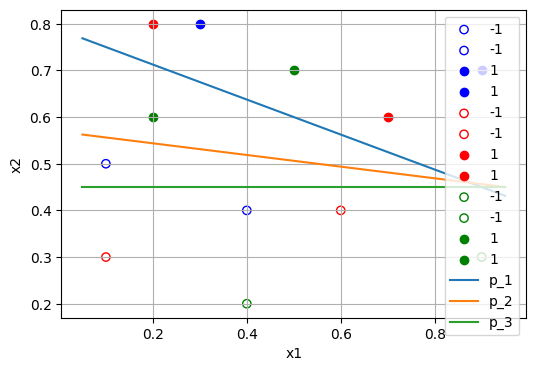

In [16]:
L = problem_instance.L
w_j = problem_instance.w_j


coeff_0 = w_j.value[0]
coeff_1 = w_j.value[1]
coeff_2 = w_j.value[2]
coeffs = [coeff_0, coeff_1, coeff_2]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1,1)

test_y_1 = boundary_equation_2d(test_x, coeff_0)
test_y_2 = boundary_equation_2d(test_x, coeff_1)
test_y_3 = boundary_equation_2d(test_x, coeff_2)



plt.figure(figsize=(6,4))
colors = ['blue', 'red', 'green']

for j in range(3):
    for l in range(4):
        if L[j][l, 2] == 1:
            plt.scatter(L[j][l, 0], L[j][l, 1], c=colors[j], marker='o', label='1')
        else:
            plt.scatter(L[j][l, 0], L[j][l, 1], facecolors='none', edgecolors=colors[j], marker='o', label='-1')

plt.plot(test_x, test_y_1, label="p_1")
plt.plot(test_x, test_y_2, label="p_2")
plt.plot(test_x, test_y_3, label="p_3")


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()